<a href="https://colab.research.google.com/github/rybak97/free_courses/blob/main/Data_Science_for_Search_Engine_Marketing_(SEM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.datacamp.com/tutorial/sem-data-science?dc_referrer=https%3A%2F%2Fwww.google.com%2F

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

In [2]:
instructors_page = 'https://web.archive.org/web/20180523235444/https://www.datacamp.com/instructors'
instructor_link_selector = '.instructor-block__description .instructor-block__link' # CSS class of the link
instructor_name_selector = '.dc-u-mb-12'  # CSS class of the name

instructor_resp = requests.get(instructors_page)
soup = BeautifulSoup(instructor_resp.text, 'lxml')

instructor_urls = [url['href'] for url in soup.select(instructor_link_selector)]
instructor_names = [name.text.strip() for name in soup.select(instructor_name_selector)]
instructor_urls = ['https://web.archive.org' + url for url in instructor_urls]

In [3]:
instructor_df = pd.DataFrame({
    'name': instructor_names,
    'url': instructor_urls
})
print(instructor_df.shape)
instructor_df.head()

(12, 2)


,name,url
0,Filip Schouwenaars,https://web.archive.org/web/20180523235444/htt...
1,Jonathan Cornelissen,https://web.archive.org/web/20180523235444/htt...
2,Hugo Bowne-Anderson,https://web.archive.org/web/20180523235444/htt...
3,Nick Carchedi,https://web.archive.org/web/20180523235444/htt...
4,Dhavide Aruliah,https://web.archive.org/web/20180523235444/htt...


col_names: This is a list of the header names of the table that we will end up uploading to Google AdWords.
words: The words that you will be combining with the instructor names to generate the full keywords / phrases.
match_types: More details can be found on AdWords help center, but here are the basics.
[data science course], "data science course", and data science course are technically three different keywords.

In [4]:
col_names = ['Campaign', 'Ad Group', 'Keyword', 'Criterion Type']
instructor_keywords = []

words = ['course', 'courses', 'learn', 'data science', 'data camp', 'datacamp']
match_types = ['Exact', 'Phrase', 'Broad']
for instructor in instructor_df['name']:
    for word in words:
        for match in match_types:
            if match == 'Broad':
                keyword = '+' + ' +'.join([instructor.replace(' ', ' +').lower(), word])  # modified broach match
            else:
                keyword = instructor.lower() + ' ' + word
            row = ['SEM_Instructors',  # campaign name
                   instructor,  # ad group name
                   keyword, # instructor <keyword>
                   match]  # keyword match type
            instructor_keywords.append(row)

# do the same by having the keywords come before the instructor name
for instructor in instructor_df['name']:
    for word in words:
        for match in match_types:
            if match == 'Broad':
                keyword = '+' + ' +'.join([word, instructor.replace(' ', ' +').lower()])
            else:
                keyword = word + ' ' + instructor.lower()
            row = ['SEM_Instructors',  # campaign name
                   instructor,  # ad group name
                   keyword, # <keyword> instructor
                   match]  # keyword match type
            instructor_keywords.append(row)


instructor_keywords_df = pd.DataFrame.from_records(instructor_keywords,
                                                   columns=col_names)
print('total keywords:', instructor_keywords_df.shape[0])
instructor_keywords_df.head()

total keywords: 432


,Campaign,Ad Group,Keyword,Criterion Type
0,SEM_Instructors,Filip Schouwenaars,filip schouwenaars course,Exact
1,SEM_Instructors,Filip Schouwenaars,filip schouwenaars course,Phrase
2,SEM_Instructors,Filip Schouwenaars,+filip +schouwenaars +course,Broad
3,SEM_Instructors,Filip Schouwenaars,filip schouwenaars courses,Exact
4,SEM_Instructors,Filip Schouwenaars,filip schouwenaars courses,Phrase


In [5]:
def generate_keywords(topics, keywords, match_types=['Exact', 'Phrase', 'Broad'],
                     campaign='SEM_Campaign'):
    col_names = ['Campaign', 'Ad Group', 'Keyword', 'Criterion Type']
    campaign_keywords = []

    for topic in topics:
        for word in keywords:
            for match in match_types:
                if match == 'Broad':
                    keyword = '+' + ' +'.join([topic.lower().replace(' ', ' +'), word.replace(' ', ' +')])
                else:
                    keyword = topic.lower() + ' ' + word
                row = [campaign,  # campaign name
                       topic,  # ad group name
                       keyword, # instructor <keyword>
                       match]  # keyword match type
                campaign_keywords.append(row)

    # I said more than twice! :)
    for topic in topics:
        for word in keywords:
            for match in match_types:
                if match == 'Broad':
                    keyword = '+' + ' +'.join([word.replace(' ', ' +'), topic.lower().replace(' ', ' +')])
                else:
                    keyword = word + ' ' + topic.lower()
                row = [campaign,  # campaign name
                       topic,  # ad group name
                       keyword, # <keyword> instructor
                       match]  # keyword match type
                campaign_keywords.append(row)

    return pd.DataFrame.from_records(campaign_keywords, columns=col_names)

In [6]:
topics = ['Data Science', 'Machine Learning']
keywords = ['course', 'tutorial']
generate_keywords(topics, keywords).head(10)

,Campaign,Ad Group,Keyword,Criterion Type
0,SEM_Campaign,Data Science,data science course,Exact
1,SEM_Campaign,Data Science,data science course,Phrase
2,SEM_Campaign,Data Science,+data +science +course,Broad
3,SEM_Campaign,Data Science,data science tutorial,Exact
4,SEM_Campaign,Data Science,data science tutorial,Phrase
5,SEM_Campaign,Data Science,+data +science +tutorial,Broad
6,SEM_Campaign,Machine Learning,machine learning course,Exact
7,SEM_Campaign,Machine Learning,machine learning course,Phrase
8,SEM_Campaign,Machine Learning,+machine +learning +course,Broad
9,SEM_Campaign,Machine Learning,machine learning tutorial,Exact


In [7]:
topics = ['R', 'Python', 'SQL', 'Git', 'Shell']  # listed on the /courses page
keywords = ['data science', 'programming', 'analytics', 'data analysis', 'machine learning',
            'deep learning', 'financial analysis', 'data viz', 'visualization', 'data visualization',
            'learn', 'course', 'courses', 'education', 'data import', 'data cleaning',
            'data manipulation', 'probability', 'stats', 'statistics', 'course', 'courses',
           'learn', 'education', 'tutorial']  # @marketing_team: this list can / should be refined or
                                              # expanded based on the strategy and how specific the
                                              # targeting needs to be
tech_keywords = generate_keywords(topics, keywords, campaign='SEM_Technologies')
print('total keywords:', tech_keywords.shape[0])
tech_keywords.head()

total keywords: 750


,Campaign,Ad Group,Keyword,Criterion Type
0,SEM_Technologies,R,r data science,Exact
1,SEM_Technologies,R,r data science,Phrase
2,SEM_Technologies,R,+r +data +science,Broad
3,SEM_Technologies,R,r programming,Exact
4,SEM_Technologies,R,r programming,Phrase


In [8]:
courses_page = 'https://web.archive.org/web/20181027214755/https://www.datacamp.com/courses/all'
course_link_selector = '.course-block-wrapper .course-block'

course_resp = requests.get(courses_page)
soup = BeautifulSoup(course_resp.text, 'lxml')

course_urls = [link.contents[1]['href'] for link in soup.select(course_link_selector)]
course_urls = ['https://web.archive.org' + url for url in course_urls]
course_names = [link.h4.text for link in soup.select(course_link_selector)]

In [9]:
course_df = pd.DataFrame({
    'name': course_names,
    'url': course_urls
})
course_df['name_clean'] = course_df.name.str.replace('\(.*\)', '').str.strip()  # remove (part x)
print('total keywords:', course_df.shape[0])
course_df.head()

total keywords: 188


,name,url,name_clean
0,Introduction to R,https://web.archive.org/web/20181027214755/htt...,Introduction to R
1,"Data Analysis in R, the data.table Way",https://web.archive.org/web/20181027214755/htt...,"Data Analysis in R, the data.table Way"
2,Data Manipulation in R with dplyr,https://web.archive.org/web/20181027214755/htt...,Data Manipulation in R with dplyr
3,Data Visualization in R with ggvis,https://web.archive.org/web/20181027214755/htt...,Data Visualization in R with ggvis
4,Reporting with R Markdown,https://web.archive.org/web/20181027214755/htt...,Reporting with R Markdown


In [10]:
keywords = ['', 'learn', 'course', 'courses', 'tutorial', 'education']
course_keywords = generate_keywords(course_df['name_clean'], keywords, campaign='SEM_Courses')
print('total keywords:', course_keywords.shape[0])
course_keywords.head(10)

total keywords: 6768


,Campaign,Ad Group,Keyword,Criterion Type
0,SEM_Courses,Introduction to R,introduction to r,Exact
1,SEM_Courses,Introduction to R,introduction to r,Phrase
2,SEM_Courses,Introduction to R,+introduction +to +r +,Broad
3,SEM_Courses,Introduction to R,introduction to r learn,Exact
4,SEM_Courses,Introduction to R,introduction to r learn,Phrase
5,SEM_Courses,Introduction to R,+introduction +to +r +learn,Broad
6,SEM_Courses,Introduction to R,introduction to r course,Exact
7,SEM_Courses,Introduction to R,introduction to r course,Phrase
8,SEM_Courses,Introduction to R,+introduction +to +r +course,Broad
9,SEM_Courses,Introduction to R,introduction to r courses,Exact


In [11]:
skills_page = 'https://web.archive.org/web/20180131112825/https://www.datacamp.com/tracks/skill'
skills_link_selector = '#all .shim'

skills_resp = requests.get(skills_page)
skill_soup = BeautifulSoup(skills_resp.text, 'lxml')

skills_urls = [link['href'] for link in skill_soup.select(skills_link_selector)]
skills_names = [skill.replace('/web/20180131112825/https://www.datacamp.com/tracks/', '').replace('-', ' ') for skill in skills_urls]
skills_urls = ['https://web.archive.org' + url for url in skills_urls]

In [12]:
skills_names

['r programming',
 'importing cleaning data with r',
 'data manipulation with r',
 'python programming',
 'importing cleaning data with python',
 'data manipulation with python',
 'statistics with r',
 'data visualization with r',
 'time series with r',
 'applied finance with r',
 'finance basics',
 'machine learning',
 'machine learning with python']

In [13]:
career_page = 'https://web.archive.org/web/20180131113301/https://www.datacamp.com/tracks/career'
career_link_selector = '#all .shim'

career_resp = requests.get(career_page)
career_soup = BeautifulSoup(career_resp.text, 'lxml')

career_urls = [link['href'] for link in career_soup.select(career_link_selector)]

career_names = [career.replace('/web/20180131113301/https://www.datacamp.com/tracks/', '').replace('-', ' ') for career in career_urls]
career_urls = ['https://web.archive.org' + url for url in career_urls]

In [14]:
tracks_df = pd.DataFrame({
    'name': skills_names + career_names,
    'url': skills_urls + career_urls
})
tracks_df['name'] = [x.title() for x in tracks_df['name']]
tracks_df.head()

,name,url
0,R Programming,https://web.archive.org/web/20180131112825/htt...
1,Importing Cleaning Data With R,https://web.archive.org/web/20180131112825/htt...
2,Data Manipulation With R,https://web.archive.org/web/20180131112825/htt...
3,Python Programming,https://web.archive.org/web/20180131112825/htt...
4,Importing Cleaning Data With Python,https://web.archive.org/web/20180131112825/htt...


In [15]:
tracks_keywords = generate_keywords(tracks_df['name'], keywords, campaign='SEM_Tracks')
print('total keywords:', tracks_keywords.shape[0])
tracks_keywords.head()

total keywords: 720


,Campaign,Ad Group,Keyword,Criterion Type
0,SEM_Tracks,R Programming,r programming,Exact
1,SEM_Tracks,R Programming,r programming,Phrase
2,SEM_Tracks,R Programming,+r +programming +,Broad
3,SEM_Tracks,R Programming,r programming learn,Exact
4,SEM_Tracks,R Programming,r programming learn,Phrase


In [16]:
full_keywords_df = pd.concat([instructor_keywords_df, tech_keywords, course_keywords, tracks_keywords])
print('total keywords:', full_keywords_df.shape[0])
print('total campaigns:', len(set(full_keywords_df['Campaign'])))
print('total ad groups:', len(set(full_keywords_df['Ad Group'])))
full_keywords_df.to_csv('keywords.csv', index=False)
full_keywords_df.head()

total keywords: 8670
total campaigns: 4
total ad groups: 225


,Campaign,Ad Group,Keyword,Criterion Type
0,SEM_Instructors,Filip Schouwenaars,filip schouwenaars course,Exact
1,SEM_Instructors,Filip Schouwenaars,filip schouwenaars course,Phrase
2,SEM_Instructors,Filip Schouwenaars,+filip +schouwenaars +course,Broad
3,SEM_Instructors,Filip Schouwenaars,filip schouwenaars courses,Exact
4,SEM_Instructors,Filip Schouwenaars,filip schouwenaars courses,Phrase


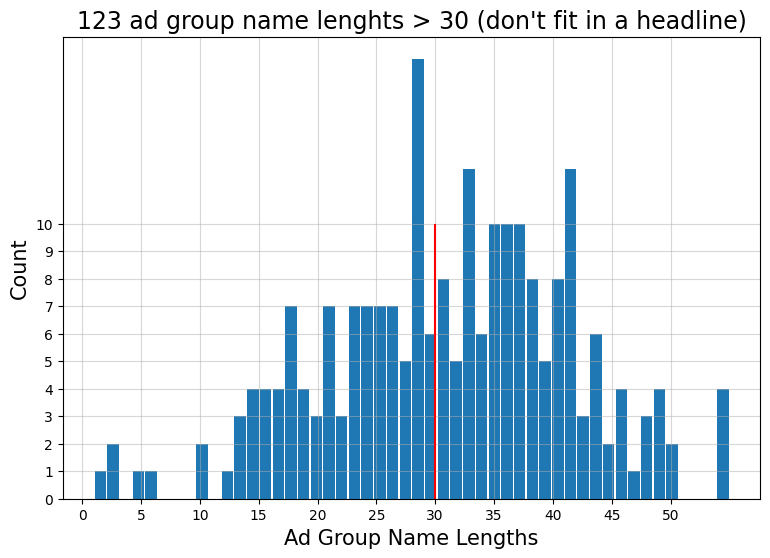

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
adgroup_lengths = pd.Series([len(adgrp) for adgrp in full_keywords_df['Ad Group'].unique()])
long_adgroups = sum(adgroup_lengths > 30)
plt.figure(figsize=(9,6))
plt.hist(adgroup_lengths, rwidth=0.9, bins=50)
plt.vlines(x=30, ymin=0, ymax=10, colors='red')
plt.title(str(long_adgroups) + ' ad group name lenghts > 30 (don\'t fit in a headline)',  fontsize=17)
plt.xlabel('Ad Group Name Lengths', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.yticks(range(11))
plt.xticks(range(0, 51, 5))
plt.grid(alpha=0.5)
plt.show()

In [19]:
def split_string(string, splits=2, max_len=60):
    """Split `string` into `splits` words, each shorter than `max_len` / `splits`"""
    if len(string) < max_len / splits:
        return string, ''
    str_words = string.split(' ')
    result = ''
    for i, word in enumerate(str_words):
        if len(result + ' ' + word) <= max_len / splits:
            result += word + ' '
        else:
            break
    spaces = result.strip().count(' ')
    result2 = string[string[len(result):].index(word) + len(result):]
    return result.strip(), result2

In [21]:
full_keywords_df.Campaign.unique()  # just to make sure you have consistent naming conventions

array(['SEM_Instructors', 'SEM_Technologies', 'SEM_Courses', 'SEM_Tracks'],
      dtype=object)

In [22]:
course_df['Campaign'] = 'SEM_Courses'
course_df = course_df.rename(columns={'name_clean': 'name', 'name': 'old_name'})
course_df.head()

,old_name,url,name,Campaign
0,Introduction to R,https://web.archive.org/web/20181027214755/htt...,Introduction to R,SEM_Courses
1,"Data Analysis in R, the data.table Way",https://web.archive.org/web/20181027214755/htt...,"Data Analysis in R, the data.table Way",SEM_Courses
2,Data Manipulation in R with dplyr,https://web.archive.org/web/20181027214755/htt...,Data Manipulation in R with dplyr,SEM_Courses
3,Data Visualization in R with ggvis,https://web.archive.org/web/20181027214755/htt...,Data Visualization in R with ggvis,SEM_Courses
4,Reporting with R Markdown,https://web.archive.org/web/20181027214755/htt...,Reporting with R Markdown,SEM_Courses


In [23]:
instructor_df['Campaign'] = 'SEM_Instructors'
instructor_df.head()

,name,url,Campaign
0,Filip Schouwenaars,https://web.archive.org/web/20180523235444/htt...,SEM_Instructors
1,Jonathan Cornelissen,https://web.archive.org/web/20180523235444/htt...,SEM_Instructors
2,Hugo Bowne-Anderson,https://web.archive.org/web/20180523235444/htt...,SEM_Instructors
3,Nick Carchedi,https://web.archive.org/web/20180523235444/htt...,SEM_Instructors
4,Dhavide Aruliah,https://web.archive.org/web/20180523235444/htt...,SEM_Instructors


In [24]:
instructor_df['Campaign'] = 'SEM_Instructors'
instructor_df.head()

,name,url,Campaign
0,Filip Schouwenaars,https://web.archive.org/web/20180523235444/htt...,SEM_Instructors
1,Jonathan Cornelissen,https://web.archive.org/web/20180523235444/htt...,SEM_Instructors
2,Hugo Bowne-Anderson,https://web.archive.org/web/20180523235444/htt...,SEM_Instructors
3,Nick Carchedi,https://web.archive.org/web/20180523235444/htt...,SEM_Instructors
4,Dhavide Aruliah,https://web.archive.org/web/20180523235444/htt...,SEM_Instructors


In [26]:
tech_domain = 'https://www.datacamp.com/category/'
tech_domain_list = []
for tech in ['R', 'Python', 'SQL', 'Git', 'Shell']:
    tech_domain_list.append((tech, tech_domain + tech))
tech_df = pd.DataFrame.from_records(tech_domain_list, columns=['name', 'url'])
tech_df['Campaign'] = 'SEM_Technologies'
tech_df

,name,url,Campaign
0,R,https://www.datacamp.com/category/R,SEM_Technologies
1,Python,https://www.datacamp.com/category/Python,SEM_Technologies
2,SQL,https://www.datacamp.com/category/SQL,SEM_Technologies
3,Git,https://www.datacamp.com/category/Git,SEM_Technologies
4,Shell,https://www.datacamp.com/category/Shell,SEM_Technologies


In [27]:
full_ads_df = pd.concat([course_df[['Campaign', 'name', 'url']],
                        instructor_df,
                        tracks_df,
                        tech_df], ignore_index=True)
full_ads_df = full_ads_df.rename(columns={'name': 'Ad Group', 'url': 'Final URL'})
print('total rows:', full_ads_df.shape[0])
n_adgroups = full_ads_df.shape[0]
full_ads_df.head()

total rows: 225


,Campaign,Ad Group,Final URL
0,SEM_Courses,Introduction to R,https://web.archive.org/web/20181027214755/htt...
1,SEM_Courses,"Data Analysis in R, the data.table Way",https://web.archive.org/web/20181027214755/htt...
2,SEM_Courses,Data Manipulation in R with dplyr,https://web.archive.org/web/20181027214755/htt...
3,SEM_Courses,Data Visualization in R with ggvis,https://web.archive.org/web/20181027214755/htt...
4,SEM_Courses,Reporting with R Markdown,https://web.archive.org/web/20181027214755/htt...


In [28]:
full_ads_df = full_ads_df.iloc[[x  for x in range(n_adgroups) for i in range(3)], :]
print('total rows:', full_ads_df.shape[0])
full_ads_df.head(9)

total rows: 675


,Campaign,Ad Group,Final URL
0,SEM_Courses,Introduction to R,https://web.archive.org/web/20181027214755/htt...
0,SEM_Courses,Introduction to R,https://web.archive.org/web/20181027214755/htt...
0,SEM_Courses,Introduction to R,https://web.archive.org/web/20181027214755/htt...
1,SEM_Courses,"Data Analysis in R, the data.table Way",https://web.archive.org/web/20181027214755/htt...
1,SEM_Courses,"Data Analysis in R, the data.table Way",https://web.archive.org/web/20181027214755/htt...
1,SEM_Courses,"Data Analysis in R, the data.table Way",https://web.archive.org/web/20181027214755/htt...
2,SEM_Courses,Data Manipulation in R with dplyr,https://web.archive.org/web/20181027214755/htt...
2,SEM_Courses,Data Manipulation in R with dplyr,https://web.archive.org/web/20181027214755/htt...
2,SEM_Courses,Data Manipulation in R with dplyr,https://web.archive.org/web/20181027214755/htt...


In [29]:
Description = [
    'Learn Directly From the Top Experts in the Field. 20% off Annual Subcriptions',
    'Be Ahead of the Curve, Master Data Science Skills. $29 / Month. Cancel Anytime',
    'Choose From a Wide Variety of Topics Tuaght by the Best in the World. Start Now'
]
Description = [x for i in range(n_adgroups) for x in Description ]
full_ads_df['Description'] = Description
full_ads_df.head()

,Campaign,Ad Group,Final URL,Description
0,SEM_Courses,Introduction to R,https://web.archive.org/web/20181027214755/htt...,Learn Directly From the Top Experts in the Fie...
0,SEM_Courses,Introduction to R,https://web.archive.org/web/20181027214755/htt...,"Be Ahead of the Curve, Master Data Science Ski..."
0,SEM_Courses,Introduction to R,https://web.archive.org/web/20181027214755/htt...,Choose From a Wide Variety of Topics Tuaght by...
1,SEM_Courses,"Data Analysis in R, the data.table Way",https://web.archive.org/web/20181027214755/htt...,Learn Directly From the Top Experts in the Fie...
1,SEM_Courses,"Data Analysis in R, the data.table Way",https://web.archive.org/web/20181027214755/htt...,"Be Ahead of the Curve, Master Data Science Ski..."


In [30]:
benefits = [
    'Boost Your Data Science Career',
    'Stand Out From the Crowd',
    'Tackle Complex Questions'
]

In [31]:
benefits = [x for i in range(n_adgroups) for x in benefits]
headlines = [split_string(x) for x in full_ads_df['Ad Group']]
full_ads_df['Headline 1'] = [x[0] for x in headlines]
full_ads_df['Headline 2'] = [x[1] if x[1] else benefits[i] for i, x in enumerate(headlines)]
print('total ads:', full_ads_df.shape[0])
full_ads_df.head(9)

total ads: 675


,Campaign,Ad Group,Final URL,Description,Headline 1,Headline 2
0,SEM_Courses,Introduction to R,https://web.archive.org/web/20181027214755/htt...,Learn Directly From the Top Experts in the Fie...,Introduction to R,Boost Your Data Science Career
0,SEM_Courses,Introduction to R,https://web.archive.org/web/20181027214755/htt...,"Be Ahead of the Curve, Master Data Science Ski...",Introduction to R,Stand Out From the Crowd
0,SEM_Courses,Introduction to R,https://web.archive.org/web/20181027214755/htt...,Choose From a Wide Variety of Topics Tuaght by...,Introduction to R,Tackle Complex Questions
1,SEM_Courses,"Data Analysis in R, the data.table Way",https://web.archive.org/web/20181027214755/htt...,Learn Directly From the Top Experts in the Fie...,"Data Analysis in R, the",data.table Way
1,SEM_Courses,"Data Analysis in R, the data.table Way",https://web.archive.org/web/20181027214755/htt...,"Be Ahead of the Curve, Master Data Science Ski...","Data Analysis in R, the",data.table Way
1,SEM_Courses,"Data Analysis in R, the data.table Way",https://web.archive.org/web/20181027214755/htt...,Choose From a Wide Variety of Topics Tuaght by...,"Data Analysis in R, the",data.table Way
2,SEM_Courses,Data Manipulation in R with dplyr,https://web.archive.org/web/20181027214755/htt...,Learn Directly From the Top Experts in the Fie...,Data Manipulation in R with,dplyr
2,SEM_Courses,Data Manipulation in R with dplyr,https://web.archive.org/web/20181027214755/htt...,"Be Ahead of the Curve, Master Data Science Ski...",Data Manipulation in R with,dplyr
2,SEM_Courses,Data Manipulation in R with dplyr,https://web.archive.org/web/20181027214755/htt...,Choose From a Wide Variety of Topics Tuaght by...,Data Manipulation in R with,dplyr


In [32]:
ads_check = (full_ads_df[['Campaign', 'Ad Group']]
             .drop_duplicates()
             .sort_values(['Campaign', 'Ad Group'])
             .reset_index(drop=True))
keywords_check = (full_keywords_df[['Campaign', 'Ad Group']]
                  .drop_duplicates()
                  .sort_values(['Campaign', 'Ad Group'])
                  .reset_index(drop=True))

all(ads_check == keywords_check)

True

In [33]:
full_ads_df.to_csv('ads.csv', index=False)